In [1298]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1299]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )

In [1300]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

In [1347]:
pip install 'matplotlib==3.3.4'

     |████████████████████████████████| 8.5 MB 403 kB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
Note: you may need to restart the kernel to use updated packages.


In [1374]:
data=pd.read_csv("/Users/miaoyu/Desktop/fff6.csv")

data.columns

Index(['Crash Time_DATE', 'ID', 'Month', 'Day of week',
       'Road Surface Condition', 'Ambient Light', 'Weather Condition', 'PRCP',
       'SNOW', 'TMAX', 'TMIN', 'lon', 'lat', 'label', 'year', 'month', 'day',
       'hour', 'hour_category', 'season', 'week'],
      dtype='object')

In [1375]:
data

,Crash Time_DATE,ID,Month,Day of week,Road Surface Condition,Ambient Light,Weather Condition,PRCP,SNOW,TMAX,...,lon,lat,label,year,month,day,hour,hour_category,season,week
0,2002-01-01 12:00:00,1,January,Tuesday,Dry,Daylight,Clear,0.0,0.0,36,...,41.948610,-71.277587,8,2002,1,1,12,day,1.0,1.0
1,2002-01-02 04:26:00,2,January,Wednesday,Dry,Dusk,Clear,0.0,0.0,39,...,41.932683,-71.296220,8,2002,1,2,4,night,1.0,1.0
2,2002-01-02 05:10:00,3,January,Wednesday,Wet,Dark - lighted roadway,Rain,0.0,0.0,39,...,41.948334,-71.277947,8,2002,1,2,5,night,1.0,1.0
3,2002-01-02 11:10:00,5,January,Wednesday,Dry,Daylight,Clear,0.0,0.0,39,...,41.938218,-71.291080,8,2002,1,2,11,day,1.0,1.0
4,2002-01-03 16:37:00,10,January,Thursday,Dry,Dusk,Clear,0.0,0.0,38,...,41.943135,-71.271522,8,2002,1,3,16,rush,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15529,2021-11-30 10:15:00,21488,November,Tuesday,Dry,Daylight,Clear,0.0,0.0,39,...,41.934056,-71.315769,5,2021,11,30,10,day,4.0,4.0
15530,2021-11-30 14:49:00,21489,November,Tuesday,Dry,Daylight,Cloudy,0.0,0.0,39,...,41.933970,-71.310037,5,2021,11,30,14,day,4.0,4.0
15531,2021-11-30 16:01:00,21490,November,Tuesday,Dry,Daylight,Clear,0.0,0.0,39,...,41.954814,-71.304793,8,2021,11,30,16,rush,4.0,4.0
15532,2021-11-30 23:27:00,21491,November,Tuesday,Dry,Dark - lighted roadway,Clear,0.0,0.0,39,...,41.919310,-71.299166,7,2021,11,30,23,night,4.0,4.0


In [1400]:
data1 = data.drop(['Crash Time_DATE', 'ID', 'Month', 'Day of week',
       'lon', 'lat', 'year', 'month', 'day',
       'hour', 'week'], axis = 1)

data1

,Road Surface Condition,Ambient Light,Weather Condition,PRCP,SNOW,TMAX,TMIN,label,hour_category,season
0,Dry,Daylight,Clear,0.0,0.0,36,13,8,day,1.0
1,Dry,Dusk,Clear,0.0,0.0,39,19,8,night,1.0
2,Wet,Dark - lighted roadway,Rain,0.0,0.0,39,19,8,night,1.0
3,Dry,Daylight,Clear,0.0,0.0,39,19,8,day,1.0
4,Dry,Dusk,Clear,0.0,0.0,38,22,8,rush,1.0
...,...,...,...,...,...,...,...,...,...,...
15529,Dry,Daylight,Clear,0.0,0.0,39,21,5,day,4.0
15530,Dry,Daylight,Cloudy,0.0,0.0,39,21,5,day,4.0
15531,Dry,Daylight,Clear,0.0,0.0,39,21,8,rush,4.0
15532,Dry,Dark - lighted roadway,Clear,0.0,0.0,39,21,7,night,4.0


In [1401]:
data1['Road Surface Condition'].value_counts()

Dry                             11638
Wet                              2906
Snow                              570
Ice                               172
0                                  99
Sand, mud, dirt, oil, gravel       62
Slush                              55
Water (standing, moving)           21
Other                              11
Name: Road Surface Condition, dtype: int64

In [1402]:
data1['Ambient Light'].value_counts()

Daylight                      11126
Dark - lighted roadway         3001
Dark - roadway not lighted      708
Dusk                            405
Dawn                            200
Dark - 0 roadway lighting        50
0                                33
Other                            11
Name: Ambient Light, dtype: int64

In [1403]:
data1.drop(data1.loc[data1['Road Surface Condition']=='0'].index, inplace=True)
data1.drop(data1.loc[data1['Road Surface Condition']=='Other'].index, inplace=True)

In [1404]:
data1.drop(data1.loc[data1['Ambient Light']=='0'].index, inplace=True)
data1.drop(data1.loc[data1['Ambient Light']=='Other'].index, inplace=True)

In [1405]:
data1['Road Surface Condition'].value_counts()

Dry                             11609
Wet                              2894
Snow                              569
Ice                               172
Sand, mud, dirt, oil, gravel       62
Slush                              55
Water (standing, moving)           21
Name: Road Surface Condition, dtype: int64

In [1406]:
data1['Ambient Light'].value_counts()

Daylight                      11057
Dark - lighted roadway         2968
Dark - roadway not lighted      707
Dusk                            403
Dawn                            197
Dark - 0 roadway lighting        50
Name: Ambient Light, dtype: int64

In [1407]:
data1.dtypes

Road Surface Condition     object
Ambient Light              object
Weather Condition          object
PRCP                      float64
SNOW                      float64
TMAX                        int64
TMIN                        int64
label                       int64
hour_category              object
season                    float64
dtype: object

In [1408]:
data1['label']=data1['label'].apply(str)

In [1409]:
data1['season']=data1['season'].apply(str)

In [1410]:
data1

,Road Surface Condition,Ambient Light,Weather Condition,PRCP,SNOW,TMAX,TMIN,label,hour_category,season
0,Dry,Daylight,Clear,0.0,0.0,36,13,8,day,1.0
1,Dry,Dusk,Clear,0.0,0.0,39,19,8,night,1.0
2,Wet,Dark - lighted roadway,Rain,0.0,0.0,39,19,8,night,1.0
3,Dry,Daylight,Clear,0.0,0.0,39,19,8,day,1.0
4,Dry,Dusk,Clear,0.0,0.0,38,22,8,rush,1.0
...,...,...,...,...,...,...,...,...,...,...
15529,Dry,Daylight,Clear,0.0,0.0,39,21,5,day,4.0
15530,Dry,Daylight,Cloudy,0.0,0.0,39,21,5,day,4.0
15531,Dry,Daylight,Clear,0.0,0.0,39,21,8,rush,4.0
15532,Dry,Dark - lighted roadway,Clear,0.0,0.0,39,21,7,night,4.0


In [1411]:
data1.dtypes

Road Surface Condition     object
Ambient Light              object
Weather Condition          object
PRCP                      float64
SNOW                      float64
TMAX                        int64
TMIN                        int64
label                      object
hour_category              object
season                     object
dtype: object

In [1412]:
data1['label'].value_counts()

8    6625
1    4870
5    1425
9    1207
2     910
4     210
7     135
Name: label, dtype: int64

In [1359]:
data1.drop(data1.loc[data1['label']=='296'].index, inplace=True)
data1.drop(data1.loc[data1['label']=='227'].index, inplace=True)
data1.drop(data1.loc[data1['label']=='77'].index, inplace=True)
data1.drop(data1.loc[data1['label']=='203'].index, inplace=True)
data1.drop(data1.loc[data1['label']=='314'].index, inplace=True)
data1.drop(data1.loc[data1['label']=='55'].index, inplace=True)

In [1360]:
data1['label'].value_counts()

74     1079
60      860
299     746
280     727
79      668
       ... 
300       3
98        3
230       3
76        2
247       2
Name: label, Length: 81, dtype: int64

array([[<AxesSubplot:title={'center':'PRCP'}>,
        <AxesSubplot:title={'center':'SNOW'}>],
       [<AxesSubplot:title={'center':'TMAX'}>,
        <AxesSubplot:title={'center':'TMIN'}>]], dtype=object)

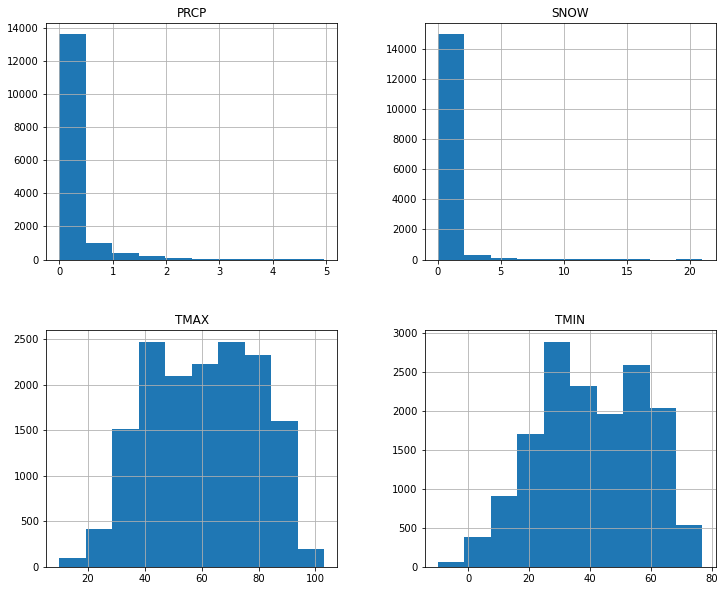

In [1361]:
data1.hist(figsize=(12,10))

In [1413]:
# Build feature/target arrays
X, y = data1.drop("label", axis=1), data1["label"].values.flatten()

In [1414]:
# Partition
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=8990, test_size=0.30, stratify=y

)

In [1415]:
X.columns

Index(['Road Surface Condition', 'Ambient Light', 'Weather Condition', 'PRCP',
       'SNOW', 'TMAX', 'TMIN', 'hour_category', 'season'],
      dtype='object')

In [1416]:
# categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown="ignore")
  )

In [1417]:
categorical_cols

['Road Surface Condition',
 'Ambient Light',
 'Weather Condition',
 'hour_category',
 'season']

In [1418]:
to_log = ["PRCP", "SNOW"]

to_scale = ["TMAX","TMIN"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

In [1419]:
# the whole processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

In [1420]:
# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            RandomForestClassifier(max_depth=10),
        ),
    ]
)

In [1421]:
_ = pipeline.fit(X_train, y_train)

In [1422]:
y_pred = pipeline.predict(X_test)

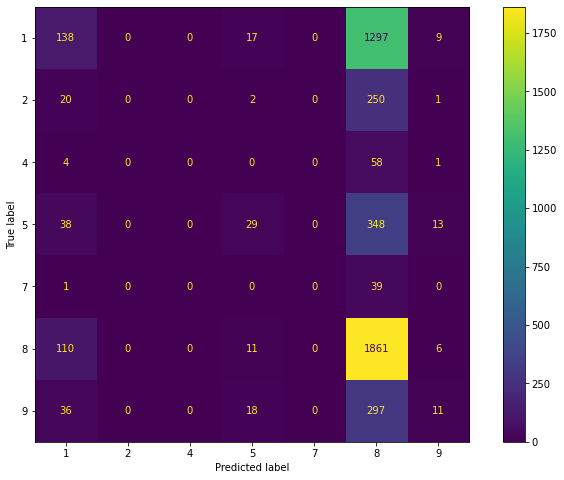

In [1423]:
# confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))

cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

In [1424]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.09      0.15      1461
           2       0.00      0.00      0.00       273
           4       0.00      0.00      0.00        63
           5       0.38      0.07      0.11       428
           7       0.00      0.00      0.00        40
           8       0.45      0.94      0.61      1988
           9       0.27      0.03      0.05       362

    accuracy                           0.44      4615
   macro avg       0.21      0.16      0.13      4615
weighted avg       0.38      0.44      0.32      4615



/Users/miaoyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miaoyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miaoyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [999]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [1001]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [1002]:
from sklearn.preprocessing import LabelEncoder

In [1003]:
count_vect=CountVectorizer()

In [1050]:
X_train_counts=count_vect.fit_transform(X_train)
tf_transformer=TfidfTransformer().fit(X_train_counts)
X_train_transformed=tf_transformer.transform(X_train_counts)

In [1054]:
X_test_counts=count_vect.transform(X_test)
X_test_transformed=tf_transformer.transform(X_test_counts)

In [1057]:
labels=LabelEncoder()

In [1073]:
y_train_labels_fit=labels.fit(y_train)
y_train_labels_trf=labels.transform(y_train)

In [1059]:
y_train_labels_fit

LabelEncoder()

In [1074]:
y_train_labels_trf

array([7, 0, 3, ..., 3, 7, 6])

In [1061]:
print(labels.classes_)

['1' '2' '4' '5' '6' '7' '8' '9']


In [1062]:
linear_svc=LinearSVC()

In [1072]:
np.array(X)

array([['Wet', 'Rain', 0.0, ..., 36, 13, 'night'],
       ['Dry', 'Clear', 0.0, ..., 39, 19, 'day'],
       ['Dry', 'Clear', 0.0, ..., 39, 19, 'rush'],
       ...,
       ['Dry', 'Clear', 0.0, ..., 39, 21, 'night'],
       ['Dry', 'Clear', 0.0, ..., 39, 21, 'rush'],
       ['Dry', 'Clear', 0.0, ..., 39, 21, 'day']], dtype=object)

In [1069]:
X = X.reshape(X.shape[1:])

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [1075]:
clf=linear_svc.fit(X_train_transformed, y_train_labels_trf)

ValueError: Found input variables with inconsistent numbers of samples: [15, 12698]

In [752]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4]

param_grid = {
    "base__n_estimators": n_estimators,
    "base__max_depth": max_depth,
    "base__min_samples_split": min_samples_split,
    "base__min_samples_leaf": min_samples_leaf,
}

In [754]:
from sklearn.metrics import make_scorer

custom_f1 = make_scorer(
    f1_score, greater_is_better=True, average="weighted", labels=["1", "8"]
  )

In [756]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hrs = HalvingRandomSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_candidates="exhaust",
    factor=5,
    n_jobs=-1,
)

In [759]:
# Fit
_ = hrs.fit(X, y)

In [762]:
# Score
best_estimator = hrs.best_estimator_

y_preds = hrs.predict(X_test)

f1_score(y_test, y_preds, average="weighted", labels=["1", "8"])

0.7365150505273188

# Other models -- All lower than 39%

In [675]:
dummies = pd.get_dummies(data1[ 'Weather Condition'])
dummies2 = pd.get_dummies(data1['hour_category'])

In [676]:
data2 = pd.concat([data1, dummies, dummies2], axis= 1)
data2 = data2.drop(['Weather Condition','hour_category'], axis=1)

data2.head()

,PRCP,SNOW,TMAX,TMIN,PRCP-1,SNOW-1,TMAX-1,TMIN-1,PRCP-2,SNOW-2,...,label,Clear,Cloudy,Cloudy/Rain,Fog,Rain,Snow,day,night,rush
0,0.0,0.0,39,19,0.0,0.0,39,19,0.0,0.0,...,8,0,0,0,0,1,0,0,1,0
1,0.0,0.0,39,19,0.0,0.0,39,19,0.0,0.0,...,8,1,0,0,0,0,0,1,0,0
2,0.0,0.0,38,22,0.0,0.0,39,19,0.0,0.0,...,7,1,0,0,0,0,0,0,0,1
3,0.0,0.0,38,22,0.0,0.0,38,22,0.0,0.0,...,8,1,0,0,0,0,0,0,0,1
4,0.0,0.0,36,16,0.0,0.0,38,22,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1


In [677]:
X2, y2 = data2.drop("label", axis=1), data2["label"]

In [690]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, random_state=8990, test_size=0.30, stratify=y
)

# SVC

In [691]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [692]:
X2_train = pd.DataFrame(scaler.fit_transform(X2_train))

In [693]:
X2_test = pd.DataFrame(scaler.transform(X2_test))

In [694]:
from sklearn.svm import SVC

In [695]:
model_svc=SVC()
model_svc.fit(X2_train, y2_train)
y2_pred=model_svc.predict(X2_test)

In [696]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           1       0.30      0.06      0.10      1653
           2       0.00      0.00      0.00       291
           4       0.00      0.00      0.00       229
           5       0.20      0.00      0.00       559
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00       132
           8       0.40      0.95      0.56      2157
           9       0.00      0.00      0.00       428

    accuracy                           0.39      5453
   macro avg       0.11      0.13      0.08      5453
weighted avg       0.27      0.39      0.25      5453



/Users/miaoyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miaoyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miaoyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [562]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(class_weight='balanced', max_depth=5)

model_dt.fit(X2_train, y2_train)

y3_pred=model_dt.predict(X2_test)

In [563]:
print(classification_report(y2_test, y3_pred))

              precision    recall  f1-score   support

           1       0.20      0.00      0.01      1818
           2       0.07      0.20      0.10       320
           4       0.08      0.05      0.06       252
           5       0.00      0.00      0.00       615
           6       0.00      0.20      0.01         5
           7       0.05      0.04      0.05       145
           8       0.40      0.51      0.45      2373
           9       0.09      0.27      0.13       470

    accuracy                           0.24      5998
   macro avg       0.11      0.16      0.10      5998
weighted avg       0.23      0.24      0.20      5998



# Random Forest

In [450]:
from sklearn.ensemble import RandomForestClassifier

In [451]:
model_rf=RandomForestClassifier(class_weight='balanced', random_state=1, max_depth=5,
                                 n_estimators=10, max_features=1)

In [565]:
model_rf.fit(X2_train, y2_train)

y4_pred=model_rf.predict(X2_test)

In [566]:
print(classification_report(y2_test, y4_pred))

              precision    recall  f1-score   support

           1       0.41      0.04      0.07      1818
           2       0.06      0.42      0.11       320
           4       0.05      0.13      0.08       252
           5       0.16      0.14      0.15       615
           6       0.01      0.20      0.01         5
           7       0.04      0.28      0.07       145
           8       0.40      0.03      0.06      2373
           9       0.08      0.20      0.12       470

    accuracy                           0.09      5998
   macro avg       0.15      0.18      0.08      5998
weighted avg       0.31      0.09      0.08      5998

